# CSE 258 - Assignment 2

In [2]:
import gzip
import json
import time
from collections import defaultdict
import plotly.graph_objects as go
from sklearn.cluster import KMeans
import tensorflow as tf
from IPython.display import Image

In [3]:
dataFolder = 'data/reduced_us_google_local'

## Reduce dataset

In [5]:
us0Min, us0Max = 24.18, 49.03
us1Min, us1Max = -125.57, -58.65
usPlacesPath = dataFolder + '/us_places.json'
usUsersPath = dataFolder + '/us_users.json'
usReviewsPath = dataFolder + '/us_reviews.json'
finalReviewsPath = dataFolder + '/final_reviews.json'
reviewsPath = dataFolder + '/reviews.clean.json.gz' 
usersPath = dataFolder + '/users.clean.json.gz'
fReviewsPath = dataFolder + '/filtered_reviews.json'
fUsersPath = dataFolder + '/filtered_users.json'
fPlacesPath = dataFolder + '/filtered_places.json'

In [4]:
def readData(path):
    with open(path) as f:
        return json.load(f)

In [26]:
def filterPlaces(path):
    placeIds = []
    f = open(usPlacesPath, 'w')
    for line in gzip.open(path):
        d = eval(line)
        if d['gps'] and d['gps'][0] > us0Min and d['gps'][0] < us0Max and d['gps'][1] > us1Min and d['gps'][1] < us1Max:
            f.write(json.dumps(d) + '\n')
            placeIds.append(d['gPlusPlaceId'])
    f.close()
    return set(placeIds)

 
    
    
def filterReviews(path, placeIds):
    f = open(usReviewsPath, 'w')
    for line in gzip.open(path):
        d = eval(line)
        if d['gPlusPlaceId'] in placeIds:
            f.write(json.dumps(d) + '\n')
    f.close()

def keepUsers(path):
    itemsPerUser = defaultdict(set)
    for line in open(path):
        d = json.loads(line)
        itemsPerUser[d['gPlusUserId']].add(d['gPlusPlaceId']) 
    k = 5
    users = []
    reviews = []
    for u in itemsPerUser:
        if len(itemsPerUser[u]) > k:
            users.append(u)
        else:
            for item in itemsPerUser[u]:
                reviews.append((u, item))
    return users, reviews

def writeUsers(path, users):
    f = open(usUsersPath, 'w')
    for line in gzip.open(path):
        d = eval(line)
        if d['gPlusUserId'] in users:
            f.write(json.dumps(d) + '\n')
    f.close()

def removeReviews(path, reviews):
    f = open(finalReviewsPath, 'w')
    for line in open(path):
        d = json.loads(line)
        if (d['gPlusUserId'], d['gPlusPlaceId']) not in reviews:
            f.write(json.dumps(d) + '\n')
    f.close()

In [5]:
t1 = time.time()
placeIds = filterPlaces(dataFolder + '/places.clean.json.gz')
t2 = time.time()
print('Time taken in secs', t2 - t1)
len(placeIds)

Time taken in secs 282.09713673591614


1308271

In [6]:
t1 = time.time()
filterReviews(dataFolder + '/reviews.clean.json.gz', placeIds)
t2 = time.time()
print('Time taken in secs', t2 - t1)

Time taken in secs 596.6306154727936


In [25]:
t1 = time.time()
kpUsers, rmReviews = keepUsers(usReviewsPath)
t2 = time.time()
print('Time taken in secs', t2 - t1)

Time taken in secs 443.93540477752686


In [27]:
t1 = time.time()
writeUsers(usersPath, set(kpUsers))
t2 = time.time()
print('Time taken in secs', t2 - t1)

Time taken in secs 319.38766956329346


In [28]:
len(rmReviews)

3416657

In [29]:
t1 = time.time()
removeReviews(usReviewsPath, set(rmReviews))
t2 = time.time()
print('Time taken in secs', t2 - t1)

Time taken in secs 395.1437101364136


In [21]:

stPlacesPath = 'data/ca/ca_places.json'
stUsersPath = 'data/ca/ca_users.json'
stReviewsPath = 'data/ca/ca_reviews.json'
stFinalReviewsPath = 'data/ca/ca_final_reviews.json'
st0Min, st0Max = 32.534, 42.009
st1Min, st1Max = -124.4, -114.13
def filterState(src, dest):
    placeIds = []
    f = open(dest, 'w')
    for line in open(src):
        d = json.loads(line)
        if d['gps'] and d['gps'][0] > st0Min and d['gps'][0] < st0Max and d['gps'][1] > st1Min and d['gps'][1] < st1Max:
            f.write(json.dumps(d) + '\n')
            placeIds.append(d['gPlusPlaceId'])
    f.close()
    return set(placeIds)

def filterReviewsState(src, dest, placeIds):
    countPerItem = defaultdict(int)
    for line in open(src):
        d = json.loads(line)
        countPerItem[d['gPlusPlaceId']] += 1
    
    k = 2
    f = open(dest, 'w')
    for line in open(src):
        d = json.loads(line)
        if countPerItem[d['gPlusPlaceId']] > k and d['gPlusPlaceId'] in placeIds:
            f.write(json.dumps(d) + '\n')
    f.close()
    
def keepUsersState(path):
    itemsPerUser = defaultdict(set)
    for line in open(path):
        d = json.loads(line)
        itemsPerUser[d['gPlusUserId']].add(d['gPlusPlaceId']) 
    k = 5
    users = []
    reviews = []
    for u in itemsPerUser:
        if len(itemsPerUser[u]) > k:
            users.append(u)
    return users

def writeUsersState(src, dest, users):
    f = open(dest, 'w')
    for line in open(src):
        d = json.loads(line)
        if d['gPlusUserId'] in users:
            f.write(json.dumps(d) + '\n')
    f.close()

def removeReviewsState(src, dest, users):
    f = open(dest, 'w')
    for line in open(src):
        d = json.loads(line)
        if d['gPlusUserId'] in users:
            f.write(json.dumps(d) + '\n')
    f.close()  

In [12]:
t1 = time.time()
placeIds = filterState(usPlacesPath, stPlacesPath)
t2 = time.time()
print('Time taken in secs', t2 - t1)

Time taken in secs 21.71014976501465


In [18]:
t1 = time.time()
filterReviewsState(usReviewsPath, stReviewsPath, placeIds)
t2 = time.time()
print('Time taken in secs', t2 - t1)

Time taken in secs 274.3517653942108


In [19]:
t1 = time.time()
keepUsers = keepUsersState(stReviewsPath)
t2 = time.time()
print('Time taken in secs', t2 - t1)

Time taken in secs 24.993324518203735


In [22]:
t1 = time.time()
writeUsersState(usUsersPath, stUsersPath, keepUsers)
t2 = time.time()
print('Time taken in secs', t2 - t1)

Time taken in secs 98.0287938117981


In [23]:
t1 = time.time()
removeReviewsState(stReviewsPath, stFinalReviewsPath, keepUsers)
t2 = time.time()
print('Time taken in secs', t2 - t1)

Time taken in secs 510.65042901039124


## Exploratory data analysis

In [5]:
userid, placeid = 'gPlusUserId', 'gPlusPlaceId'

In [6]:
reviews = readData(fReviewsPath)
users = readData(fUsersPath)
places = readData(fPlacesPath)

In [7]:
len(reviews), len(users), len(places)

(308846, 20000, 218132)

In [8]:
placesDict = {d[placeid]: d for d in places}
usersDict = {d[userid]: d for d in users}

In [9]:
itemsPerUser, usersPerItem = defaultdict(set), defaultdict(set)
for d in reviews:
    itemsPerUser[d[userid]].add(d[placeid])
    usersPerItem[d[placeid]].add(d[userid])

In [28]:
lat, long, text = [], [], []
for item in itemsPerUser[reviews[10000][userid]]:
    d = placesDict[item]
    if d['gps']:
        lat.append(d['gps'][0])
        long.append(d['gps'][1])
        text.append(d['name'])

In [29]:
len(lat)

212

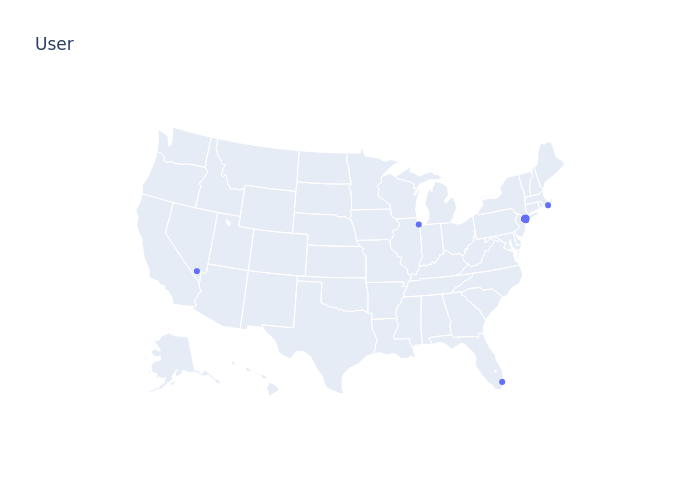

In [38]:
fig = go.Figure(data=go.Scattergeo(
        lon = long[-100:],
        lat = lat[-100:],
        mode = 'markers'
        ))
fig.update_layout(
        title = 'User',
        geo_scope='usa',
    )
imgBytes = fig.to_image(format="png")
Image(imgBytes)

In [36]:
places[179], reviews[0]

({'name': 'Special Thai Restaurant',
  'price': '$$',
  'address': ['511 S Brookhurst St', 'Anaheim, CA 92804'],
  'hours': [['Monday', [['11:00 am--9:00 pm']]],
   ['Tuesday', [['11:00 am--9:00 pm']]],
   ['Wednesday', [['11:00 am--9:00 pm']], 1],
   ['Thursday', [['11:00 am--9:00 pm']]],
   ['Friday', [['11:00 am--9:00 pm']]],
   ['Saturday', [['11:00 am--9:00 pm']]],
   ['Sunday', [['11:00 am--9:00 pm']]]],
  'phone': '(714) 635-2920',
  'closed': False,
  'gPlusPlaceId': '109197242611730996653',
  'gps': [33.826256, -117.959043]},
 {'rating': 5.0,
  'reviewerName': 'Chris Johnson',
  'reviewText': None,
  'categories': ['American Restaurant', 'Bar'],
  'gPlusPlaceId': '103654778391814923896',
  'unixReviewTime': 1311509683,
  'reviewTime': 'Jul 24, 2011',
  'gPlusUserId': '100000524810171549476'})

## Model

### Baseline 1: Popularity

In [6]:
placesCount = defaultdict(int)
for r in reviews:
    placesCount[r['gPlusPlaceId']] += 1
popularPlaces = sorted([(placesCount[p], p) for p in placesCount], reverse=False)

In [12]:
popularPlaces[0], reviews[0]

((1, '100000007848517518160'),
 {'rating': 4.0,
  'reviewerName': 'william spindler',
  'reviewText': 'Best War Wanton soup in Red Bluff',
  'categories': ['Asian Restaurant', 'Chinese Restaurant'],
  'gPlusPlaceId': '106591714648856494903',
  'unixReviewTime': 1394669496,
  'reviewTime': 'Mar 12, 2014',
  'gPlusUserId': '100000032416892623125'})

In [ ]:
class FPMC(tf.keras.Model):
    def __init__(self, K, lamb, UI = 1, IJ = 1):
        super(FPMC, self).__init__()
        # Initialize variables
        self.betaI = tf.Variable(tf.random.normal([len(itemIDs)],stddev=0.001))
        self.gammaUI = tf.Variable(tf.random.normal([len(userIDs),K],stddev=0.001))
        self.gammaIU = tf.Variable(tf.random.normal([len(itemIDs),K],stddev=0.001))
        self.gammaIJ = tf.Variable(tf.random.normal([len(itemIDs),K],stddev=0.001))
        self.gammaJI = tf.Variable(tf.random.normal([len(itemIDs),K],stddev=0.001))
        # Regularization coefficient
        self.lamb = lamb
        # Which terms to include
        self.UI = UI
        self.IJ = IJ

    # Prediction for a single instance
    def predict(self, u, i, j):
        p = self.betaI[i] + self.UI * tf.tensordot(self.gammaUI[u], self.gammaIU[i], 1) +\
                            self.IJ * tf.tensordot(self.gammaIJ[i], self.gammaJI[j], 1)
        return p
    
    def predictSample(self, sampleU, sampleI, sampleJ):
        u = tf.convert_to_tensor(sampleU, dtype=tf.int32)
        i = tf.convert_to_tensor(sampleI, dtype=tf.int32)
        j = tf.convert_to_tensor(sampleJ, dtype=tf.int32)
        gamma_ui = tf.nn.embedding_lookup(self.gammaUI, u)
        gamma_iu = tf.nn.embedding_lookup(self.gammaIU, i)
        gamma_ij = tf.nn.embedding_lookup(self.gammaIJ, i)
        gamma_ji = tf.nn.embedding_lookup(self.gammaJI, j)
        beta_i = tf.nn.embedding_lookup(self.betaI, i)
        return beta_i + self.UI * tf.reduce_sum(tf.multiply(gamma_ui, gamma_iu), 1) +\
                         self.IJ * tf.reduce_sum(tf.multiply(gamma_ij, gamma_ji), 1)
    

    # Regularizer
    def reg(self):
        return self.lamb * (tf.nn.l2_loss(self.betaI) +\
                            tf.nn.l2_loss(self.gammaUI) +\
                            tf.nn.l2_loss(self.gammaIU) +\
                            tf.nn.l2_loss(self.gammaIJ) +\
                            tf.nn.l2_loss(self.gammaJI))

    def call(self, sampleU, # user
                   sampleI, # item
                   sampleJ, # previous item
                   sampleK): # negative item
        u = tf.convert_to_tensor(sampleU, dtype=tf.int32)
        i = tf.convert_to_tensor(sampleI, dtype=tf.int32)
        j = tf.convert_to_tensor(sampleJ, dtype=tf.int32)
        k = tf.convert_to_tensor(sampleK, dtype=tf.int32)
        gamma_ui = tf.nn.embedding_lookup(self.gammaUI, u)
        gamma_iu = tf.nn.embedding_lookup(self.gammaIU, i)
        gamma_ij = tf.nn.embedding_lookup(self.gammaIJ, i)
        gamma_ji = tf.nn.embedding_lookup(self.gammaJI, j)
        beta_i = tf.nn.embedding_lookup(self.betaI, i)
        x_uij = beta_i + self.UI * tf.reduce_sum(tf.multiply(gamma_ui, gamma_iu), 1) +\
                         self.IJ * tf.reduce_sum(tf.multiply(gamma_ij, gamma_ji), 1)
        gamma_uk = tf.nn.embedding_lookup(self.gammaUI, u)
        gamma_ku = tf.nn.embedding_lookup(self.gammaIU, k)
        gamma_kj = tf.nn.embedding_lookup(self.gammaIJ, k)
        gamma_jk = tf.nn.embedding_lookup(self.gammaJI, j)
        beta_k = tf.nn.embedding_lookup(self.betaI, k)
        x_ukj = beta_k + self.UI * tf.reduce_sum(tf.multiply(gamma_uk, gamma_ku), 1) +\
                         self.IJ * tf.reduce_sum(tf.multiply(gamma_kj, gamma_jk), 1)
        return -tf.reduce_mean(tf.math.log(tf.math.sigmoid(x_uij - x_ukj)))

In [ ]:
class PopularBaseline():
    def __init__(self):
        placesCount = defaultdict(int)
        for i, r in data_reviews.iterrows():
            placesCount[r['gPlusPlaceId']] += 1
        popularPlaces = sorted([(placesCount[p], p) for p in placesCount], reverse=False)
        self.popScore = [0] * len(itemIDs)
        for i, (c, p) for enumerate(popularPlaces):
            self.popScore[itemIDs[p]] = i
    
    def predict(self, u, i, j):
        return self.popScore[i]

In [37]:
count = set()
for d in reviews:
    if (d[userid], d[placeid]) in count:
        print(userid, placeid)
    count.add((d[userid], d[placeid]))

## Evaluate